In [ ]:
all_connections = {
    "panoptic": [
        (7, 8),
        (6, 7),
        (2, 6),
        (2, 12),
        (12, 13),
        (13, 14),
        (2, 0),
        (0, 3),
        (0, 9),
        (3, 4),
        (4, 5),
        (9, 10),
        (10, 11),
        (0, 16),
    ],
    "skiPose": [
        [0, 1],
        [1, 2],
        [2, 3],
        [0, 4],
        [4, 5],
        [5, 6],
        [8, 9],
        [9, 10],
        [8, 11],
        [11, 12],
        [12, 13],
        [0, 7],
        [14, 15],
        [15, 16],
        [7, 8],
        [14, 8],
    ],
}

import sys

sys.path.append("..")

from pose_estimation.models import getPoseEstimModel
from pose_estimation.utils import getDatasetLoader, getLatestModel
from dataloaders.datasets import out_joints, pose_datasets
import torch
from torchvision.models.resnet import ResNet50_Weights, ResNet18_Weights
import torchvision.transforms as T


dataset = "skiPose"
models_out = [
    "skiPose" for i in range(30)
] 
datasets_dir = "../datasets"
models = [
    "../trained_models/simclr50Ski_estim_ski_10%",
    "../trained_models/simclr50Ski_estim_ski_50%",
    "../trained_models/simclr50Ski_estim_ski_random10%",
    "../trained_models/simclr50Ski_estim_ski_random50%",
    "../trained_models/simsiam50Ski_estim_ski_10%",
    "../trained_models/simsiam50Ski_estim_ski_50%",
    "../trained_models/simsiam50Ski_estim_ski_random10%",
    "../trained_models/simsiam50Ski_estim_ski_random50%",
    "../trained_models/resnet50_estim_ski_10%",
    "../trained_models/resnet50_estim_ski_50%",
    "../trained_models/resnet50_estim_ski_random10%",
    "../trained_models/resnet50_estim_ski_random50%",
    "../trained_models/resnet50_estim_ski_full",
    "../trained_models/simclr18Ski_estim_ski_10%",
    "../trained_models/simclr18Ski_estim_ski_50%",
    "../trained_models/simclr18Ski_estim_ski_random10%",
    "../trained_models/simclr18Ski_estim_ski_random50%",
    "../trained_models/simsiam18Ski_estim_ski_10%",
    "../trained_models/simsiam18Ski_estim_ski_50%",
    "../trained_models/simsiam18Ski_estim_ski_random10%",
    "../trained_models/simsiam18Ski_estim_ski_random50%",
    "../trained_models/moco18Ski_estim_ski_10%",
    "../trained_models/moco18Ski_estim_ski_50%",
    "../trained_models/moco18Ski_estim_ski_random10%",
    "../trained_models/moco18Ski_estim_ski_random50%",
    "../trained_models/resnet18_estim_ski_10%",
    "../trained_models/resnet18_estim_ski_50%",
    "../trained_models/resnet18_estim_ski_random10%",
    "../trained_models/resnet18_estim_ski_random50%",
    "../trained_models/resnet18_estim_ski_full",
]
names = [
    "simclr 50 10%",
    "simclr 50 50%",
    "simclr 50 10% random",
    "simclr 50 50% random",
    "simsiam 50 10%",
    "simsiam 50 50%",
    "simsiam 50 10% random",
    "simsiam 50 50% random",
    "resnet 50 10%",
    "resnet 50 50%",
    "resnet 50 10% random",
    "resnet 50 50% random",
    "resnet 50 full",
    "simclr 18 10%",
    "simclr 18 50%",
    "simclr 18 10% random",
    "simclr 18 50% random",
    "simsiam 18 10%",
    "simsiam 18 50%",
    "simsiam 18 10% random",
    "simsiam 18 50% random",
    "moco 18 10%",
    "moco 18 50%",
    "moco 18 10% random",
    "moco 18 50% random",
    "resnet 18 10%",
    "resnet 18 50%",
    "resnet 18 10% random",
    "resnet 18 50% random",
    "resnet 18 full",
]
backbones = [ "resnet50" for i in range(13)] + ["resnet18" for i in range(17)]

architectures = [
    [128] for i in range(len(models))
]
activations = [
    "gelu" for i in range(len(models))
]
out_dim = [out_joints[model_out] * 3 for model_out in models_out]
LN = [
    True for i in range(len(models))
]
device = "cuda" if torch.cuda.is_available() else "cpu"

test_data = {}

transforms = ResNet18_Weights.DEFAULT.transforms()
transforms = T.Compose([T.ToPILImage(), transforms])
_, _, test_data["resnet18"] = pose_datasets[dataset](transforms, datasets_dir)


transforms = ResNet50_Weights.DEFAULT.transforms()
transforms = T.Compose([T.ToPILImage(), transforms])
_, _, test_data["resnet50"] = pose_datasets[dataset](transforms, datasets_dir)

clear_models = []
for i, model in enumerate(models):
    print("loading model: ", model, f" with {architectures[i]} {out_dim[i]} {backbones[i]} {LN[i]} {activations[i]}") 
    clear_model = getPoseEstimModel(
        "",
        "resnet",
        architectures[i],
        out_dim[i],
        device,
        backbones[i],
        LN[i],
        activations[i],
    )
    model_checkpoint = getLatestModel(model)
    print("\tloading model from: ", model_checkpoint)
    clear_model.load_state_dict(
        torch.load(model_checkpoint, map_location=torch.device(device))
    )
    clear_models.append(clear_model)
    print("\tmodel loaded")

# print(clear_model1 == clear_model2)
if device == "cpu":
    for model in clear_models:
        model = model.module

loading model:  ../trained_models/simclr50Ski_estim_ski_10%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simclr50Ski_estim_ski_10%/epoch_42.pt


C:\Users\david\AppData\Local\Temp\ipykernel_31932\1542934759.py:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_checkpoint, map_location=torch.device(dev

	model loaded
loading model:  ../trained_models/simclr50Ski_estim_ski_50%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simclr50Ski_estim_ski_50%/epoch_47.pt
	model loaded
loading model:  ../trained_models/simclr50Ski_estim_ski_random10%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simclr50Ski_estim_ski_random10%/epoch_19.pt
	model loaded
loading model:  ../trained_models/simclr50Ski_estim_ski_random50%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simclr50Ski_estim_ski_random50%/epoch_14.pt
	model loaded
loading model:  ../trained_models/simsiam50Ski_estim_ski_10%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simsiam50Ski_estim_ski_10%/epoch_43.pt
	model loaded
loading model:  ../trained_models/simsiam50Ski_estim_ski_50%  with [128] 51 resnet50 True gelu
	loading model from:  ../trained_models/simsiam50Ski_estim_ski_50%/epoch_25.pt
	model loaded
loading model:  ../trained_m

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pose_estimation.functions import find_rotation_mat  # As per your instruction
from scipy.spatial.transform import Rotation as R
from pose_estimation.functions import get_loss


def plot_models(
    models,
    backbones,
    index,
    all_connections,
    test_data,
    dataset,
    model_outs,
    model_names,
    show_image=True,
    models_to_plot=None,
):
    """
    Plots predictions from multiple models against a single ground truth,
    with each pose normalized individually to the range [0, 1] while maintaining proportions.
    Aligns each pose to be upright (perpendicular to the floor) and facing the viewer.
    Each pose is plotted in a separate subplot for clarity.

    Args:
        models (list): A list of trained pose estimation models.
        backbones (list): A list of backbone names corresponding to each model.
        index (int): The index of the data sample to visualize.
        all_connections (dict): A dictionary mapping dataset names to their joint connections.
        test_data (dict): A dictionary containing test datasets mapped by backbone names.
        dataset (str): The name of the dataset to use for plotting (determines the connections for ground truth).
        model_outs (list): A list of dataset names corresponding to each model's output format, used to get connections.
        model_names (list): A list of names for each model, used in plot titles and legends.
        show_image (bool): Whether to display the original image alongside the 3D plots.
        models_to_plot (list or None): List of indices of models to plot. If None, all models are plotted.

    Raises:
        ValueError: If the lengths of models, backbones, model_outs, and model_names do not match.
        ValueError: If the specified dataset is not found in all_connections.
    """
    # Validate input lengths
    if not (len(models) == len(backbones) == len(model_outs) == len(model_names)):
        raise ValueError(
            "The lengths of models, backbones, model_outs, and model_names must be equal."
        )

    # Validate dataset
    if dataset not in all_connections:
        raise ValueError(f"Dataset '{dataset}' not found in all_connections.")

    num_models = len(models)

    # Handle models_to_plot
    if models_to_plot is None:
        models_to_plot = list(range(num_models))
    else:
        # Validate models_to_plot
        if not all(0 <= idx < num_models for idx in models_to_plot):
            raise ValueError("models_to_plot contains invalid model indices.")

    # Collect ground truth pose and image from the first backbone's test data
    first_backbone = backbones[0]
    if first_backbone not in test_data:
        raise ValueError(f"Test data key '{first_backbone}' not found in test_data.")

    ground_sample = test_data[first_backbone][index]
    ground_image = ground_sample["image"]
    ground_coords = ground_sample["poses_3d"].reshape((-1, 3))
    device = next(models[0].parameters()).device
    ground_coords_tensor = torch.tensor(ground_coords, dtype=torch.float32).to(device)

    # Align and normalize ground truth pose
    ground_coords_aligned = align_pose(ground_coords_tensor, dataset)
    ground_coords_normalized = normalize_pose(ground_coords_aligned)

    # Determine subplot layout
    total_plots = (
        len(models_to_plot) + (1 if show_image else 0) + 1
    )  # +1 for ground truth
    max_cols = 4
    ncols = min(total_plots, max_cols)
    nrows = (total_plots + max_cols - 1) // max_cols  # Ceiling division
    fig = plt.figure(figsize=(5 * ncols, 5 * nrows))

    plot_idx = 1

    # Plot ground truth
    gt_connections = all_connections[dataset]
    ax_gt = fig.add_subplot(nrows, ncols, plot_idx, projection="3d")
    plot_pose(
        ax_gt, ground_coords_normalized, gt_connections, title="Ground Truth", color="b"
    )
    plot_idx += 1

    # Plot each model's prediction in separate subplots
    losses = {}
    pred_normalized = {}
    model_connections = {}
    for i in models_to_plot:
        model = models[i]
        backbone = backbones[i]
        model_out = model_outs[i]
        model_name = model_names[i]
        pred_aligned, pred = get_model_prediction(
            model, backbone, test_data, index, model_out
        )
        loss = get_loss(
            pred.unsqueeze(0),
            torch.tensor(ground_sample["poses_3d"]).unsqueeze(0).to(pred.device),
        )
        pred_normalized[model_name] = normalize_pose(pred_aligned)
        model_connections[model_name] = all_connections[model_out]
        
        losses[model_name] = loss

    
    # sort the losses
    losses = dict(sorted(losses.items(), key=lambda item: item[1]))
    print("Ranking:")
    for i, model in enumerate(losses):
        print(f'\t{i+1} - "{model}" Loss {losses[model]}')
        
        ax_model = fig.add_subplot(nrows, ncols, plot_idx, projection="3d")
        plot_pose(
            ax_model,
            pred_normalized[model],
            model_connections[model],
            title=model,
            color="r",
            loss=loss,
        )
        plot_idx += 1


    # Plot the image if required
    if show_image:
        ax_img = fig.add_subplot(nrows, ncols, plot_idx)
        plot_image(ax_img, ground_image)
        plot_idx += 1

    plt.tight_layout()
    plt.show()


def normalize_pose(pose):
    # Convert to NumPy array if it's a torch tensor
    if isinstance(pose, torch.Tensor):
        pose = pose.cpu().numpy()
    elif isinstance(pose, np.ndarray):
        pass
    else:
        raise TypeError("Pose must be a torch.Tensor or numpy.ndarray.")

    return pose


def get_model_prediction(model, backbone, test_data, index, model_out):
    """Gets and processes the prediction from a single model."""
    device = next(model.parameters()).device
    sample = test_data[backbone][index]
    image = sample["image"]
    image_tensor = image.unsqueeze(0).to(device)

    # Model Prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        pred_model = model(
            image_tensor
        )  # Assuming model outputs (batch_size, num_joints*3)
        pred = pred_model[0].reshape((-1, 3)).detach()
        pred_aligned = align_pose(pred, model_out)
        pred_np = pred_aligned.cpu().numpy()

    return pred_np, pred_model


def align_pose(pose_tensor, dataset_name):
    """
    Aligns the pose to be upright (perpendicular to the floor) and facing the viewer.

    Args:
        pose_tensor (torch.Tensor): Pose tensor of shape (N, 3).
        dataset_name (str): The name of the dataset to determine joint indices.

    Returns:
        torch.Tensor: Aligned pose tensor of shape (N, 3).
    """
    # Center the pose around its mean
    pose_centered = pose_tensor - pose_tensor.mean(dim=0)

    # Define joint indices based on the dataset
    # Adjust these indices according to your dataset's joint definitions
    if dataset_name == "panoptic":
        hip_index = 2
        head_index = 14
        left_shoulder_index = 9
        right_shoulder_index = 3
    elif dataset_name == "skiPose":
        hip_index = 0
        head_index = 14
        left_shoulder_index = 5
        right_shoulder_index = 2
    else:
        # Default indices
        hip_index = 0
        head_index = -1
        left_shoulder_index = 5
        right_shoulder_index = 6

    # Compute the "up" vector (from hips to head)
    if hip_index < len(pose_centered) and head_index < len(pose_centered):
        up_vector = pose_centered[head_index] - pose_centered[hip_index]
    else:
        up_vector = torch.tensor(
            [0, 0, 1], dtype=pose_tensor.dtype, device=pose_tensor.device
        )

    # Normalize the up vector
    up_vector_norm = torch.norm(up_vector)
    if up_vector_norm == 0:
        up_vector = torch.tensor(
            [0, 0, 1], dtype=pose_tensor.dtype, device=pose_tensor.device
        )
    else:
        up_vector = up_vector / up_vector_norm

    # Desired up vector (aligned with Z-axis)
    target_up = torch.tensor(
        [0, 0, 1], dtype=pose_tensor.dtype, device=pose_tensor.device
    )

    # Compute rotation to align up_vector with target_up
    rotation_mat = compute_alignment_rotation(up_vector, target_up)

    # Apply rotation
    pose_aligned = torch.matmul(pose_centered, rotation_mat.T)

    # Rotate around Z-axis to face the viewer
    # Compute the forward vector (from left shoulder to right shoulder)
    if left_shoulder_index < len(pose_aligned) and right_shoulder_index < len(
        pose_aligned
    ):
        forward_vector = (
            pose_aligned[right_shoulder_index] - pose_aligned[left_shoulder_index]
        )
    else:
        forward_vector = torch.tensor(
            [1, 0, 0], dtype=pose_tensor.dtype, device=pose_tensor.device
        )

    # Project forward_vector onto XY-plane
    forward_vector_xy = forward_vector.clone()
    forward_vector_xy[2] = 0
    forward_vector_xy_norm = torch.norm(forward_vector_xy)
    if forward_vector_xy_norm == 0:
        forward_vector_xy = torch.tensor(
            [1, 0, 0], dtype=pose_tensor.dtype, device=pose_tensor.device
        )
    else:
        forward_vector_xy = forward_vector_xy / forward_vector_xy_norm

    # Desired forward direction (Y-axis)
    target_forward = torch.tensor(
        [0, 1, 0], dtype=pose_tensor.dtype, device=pose_tensor.device
    )

    # Compute rotation around Z-axis to align forward_vector_xy with target_forward
    angle_z = torch.atan2(forward_vector_xy[1], forward_vector_xy[0]) - torch.atan2(
        target_forward[1], target_forward[0]
    )
    cos_angle = torch.cos(-angle_z)
    sin_angle = torch.sin(-angle_z)
    rotation_z = torch.tensor(
        [[cos_angle, -sin_angle, 0], [sin_angle, cos_angle, 0], [0, 0, 1]],
        dtype=pose_tensor.dtype,
        device=pose_tensor.device,
    )

    # Apply rotation around Z-axis
    pose_aligned = torch.matmul(pose_aligned, rotation_z.T)

    return pose_aligned


def compute_alignment_rotation(source_vector, target_vector):
    """
    Computes the rotation matrix that aligns source_vector to target_vector.

    Args:
        source_vector (torch.Tensor): Source vector of shape (3,).
        target_vector (torch.Tensor): Target vector of shape (3,).

    Returns:
        torch.Tensor: Rotation matrix of shape (3, 3).
    """
    v = torch.cross(source_vector, target_vector)
    c = torch.dot(source_vector, target_vector)
    s = torch.norm(v)

    if s == 0:
        # Vectors are parallel
        if c > 0:
            # Same direction
            return torch.eye(3, dtype=source_vector.dtype, device=source_vector.device)
        else:
            # Opposite direction
            # Rotate 180 degrees around any orthogonal axis
            orthogonal_axis = torch.tensor(
                [1, 0, 0], dtype=source_vector.dtype, device=source_vector.device
            )
            if torch.allclose(source_vector, orthogonal_axis):
                orthogonal_axis = torch.tensor(
                    [0, 1, 0], dtype=source_vector.dtype, device=source_vector.device
                )
            v = torch.cross(source_vector, orthogonal_axis)
            v = v / torch.norm(v)
            return rotation_matrix_from_axis_angle(v, torch.pi)
    else:
        kmat = torch.tensor(
            [[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]],
            dtype=source_vector.dtype,
            device=source_vector.device,
        )
        rotation_matrix = (
            torch.eye(3, dtype=source_vector.dtype, device=source_vector.device)
            + kmat
            + kmat @ kmat * ((1 - c) / (s**2))
        )
        return rotation_matrix


def rotation_matrix_from_axis_angle(axis, angle):
    """
    Computes the rotation matrix from an axis and angle using Rodrigues' rotation formula.

    Args:
        axis (torch.Tensor): Rotation axis of shape (3,).
        angle (float): Rotation angle in radians.

    Returns:
        torch.Tensor: Rotation matrix of shape (3, 3).
    """
    K = torch.tensor(
        [[0, -axis[2], axis[1]], [axis[2], 0, -axis[0]], [-axis[1], axis[0], 0]],
        dtype=axis.dtype,
        device=axis.device,
    )

    R = (
        torch.eye(3, dtype=axis.dtype, device=axis.device)
        + torch.sin(angle) * K
        + (1 - torch.cos(angle)) * torch.matmul(K, K)
    )
    return R


def plot_pose(ax, pose, connections, title="", color="r", loss=0):
    """Plots a single pose in a 3D subplot."""
    ax.scatter(pose[:, 0], pose[:, 1], pose[:, 2], c=color)
    for connection in connections:
        start, end = connection
        if start < len(pose) and end < len(pose):
            ax.plot(
                [pose[start, 0], pose[end, 0]],
                [pose[start, 1], pose[end, 1]],
                [pose[start, 2], pose[end, 2]],
                c=color,
            )
    # write name and loss (in scientific notation)
    ax.set_title(f"{title} - Error {loss:.2E}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.view_init(elev=20, azim=180)  # Adjust view angle for better visualization


def plot_image(ax, image_tensor):
    """Plots the image in a subplot."""
    # Convert image tensor to numpy array
    img = image_tensor.clone().detach().cpu()
    if img.shape[0] == 1:
        img = img.squeeze(0)  # Remove channel dimension for grayscale
        img = img.numpy()
        cmap = "gray"
    else:
        img = img.permute(1, 2, 0).numpy()
        cmap = None  # RGB image

    # Ensure image values are in [0,1]
    img = img - img.min()
    if img.max() != 0:
        img = img / img.max()

    ax.imshow(img, cmap=cmap)
    ax.set_title("Original Image")
    ax.axis("off")

In [6]:
# generate unique indexes
# indexes = np.random.choice(len(test_data["resnet50"]), 3, replace=False)
indexes = [0, 1, 2]

________________________________________________________
Index:  0


C:\Users\david\AppData\Local\Temp\ipykernel_31932\506555942.py:300: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Cross.cpp:66.)
  v = torch.cross(source_vector, target_vector)


Ranking:
	1 - "resnet 50 10% random" Loss 0.09913824498653412
	2 - "resnet 18 50%" Loss 0.10108208656311035
	3 - "simsiam 50 10%" Loss 0.10292310267686844
	4 - "resnet 18 full" Loss 0.10378409177064896
	5 - "simsiam 50 50%" Loss 0.10638812184333801
	6 - "moco 18 10%" Loss 0.10656911879777908
	7 - "simclr 50 50%" Loss 0.10676389187574387
	8 - "moco 18 50%" Loss 0.1119031310081482
	9 - "simsiam 50 10% random" Loss 0.11212550848722458
	10 - "simsiam 18 50%" Loss 0.11696121096611023
	11 - "simsiam 18 10%" Loss 0.11782528460025787
	12 - "resnet 50 50%" Loss 0.11818640679121017
	13 - "simclr 18 10%" Loss 0.1259911060333252
	14 - "simclr 18 10% random" Loss 0.12734253704547882
	15 - "simclr 50 10%" Loss 0.12897054851055145
	16 - "resnet 50 full" Loss 0.1310635209083557
	17 - "simclr 18 50%" Loss 0.13279999792575836
	18 - "resnet 50 10%" Loss 0.13394039869308472
	19 - "simclr 18 50% random" Loss 0.13720837235450745
	20 - "simsiam 18 50% random" Loss 0.13796666264533997
	21 - "simclr 50 10% ran

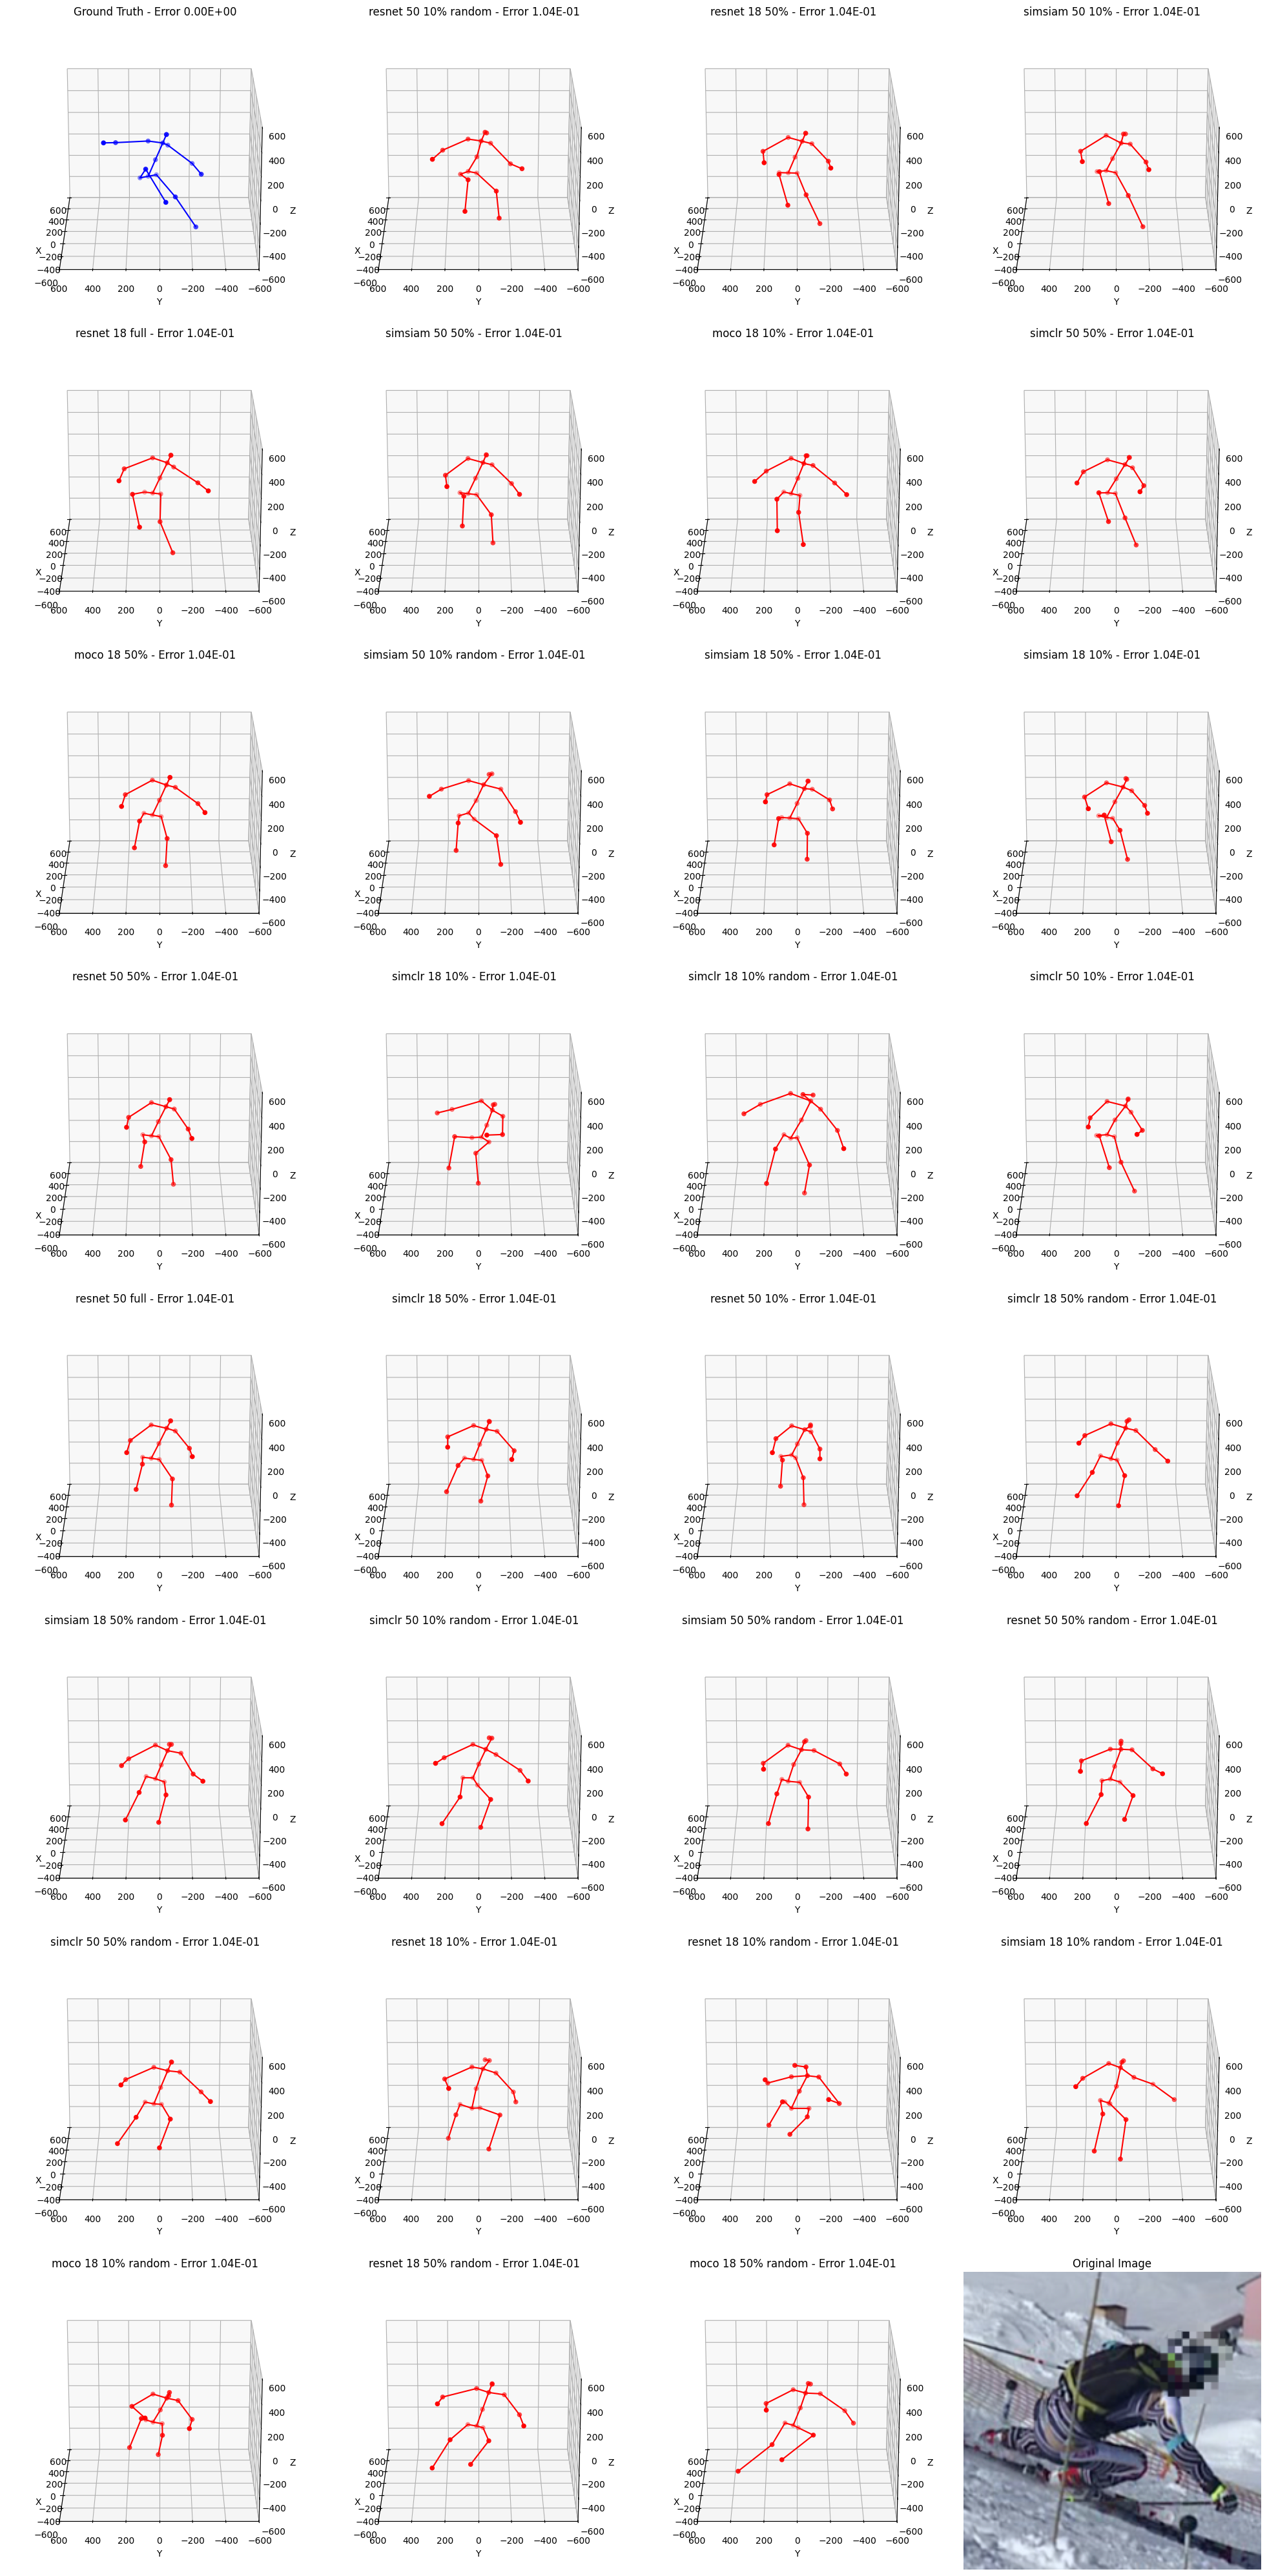

________________________________________________________
Index:  1
Ranking:
	1 - "resnet 50 full" Loss 0.10467905551195145
	2 - "simsiam 50 50%" Loss 0.11140180379152298
	3 - "resnet 18 full" Loss 0.11566653102636337
	4 - "simclr 18 10%" Loss 0.1193748489022255
	5 - "simclr 50 50%" Loss 0.12216012924909592
	6 - "resnet 50 10%" Loss 0.12337207794189453
	7 - "simsiam 50 10% random" Loss 0.12348520010709763
	8 - "moco 18 50%" Loss 0.12458664923906326
	9 - "simclr 18 50%" Loss 0.12511572241783142
	10 - "resnet 50 50%" Loss 0.13090594112873077
	11 - "simclr 50 10% random" Loss 0.133957639336586
	12 - "resnet 18 50%" Loss 0.13397683203220367
	13 - "simsiam 50 10%" Loss 0.13726669549942017
	14 - "simclr 18 50% random" Loss 0.13747233152389526
	15 - "moco 18 10%" Loss 0.13752815127372742
	16 - "simclr 50 10%" Loss 0.1423112452030182
	17 - "simsiam 18 10% random" Loss 0.14250822365283966
	18 - "simclr 50 50% random" Loss 0.14426495134830475
	19 - "moco 18 10% random" Loss 0.14521285891532898
	2

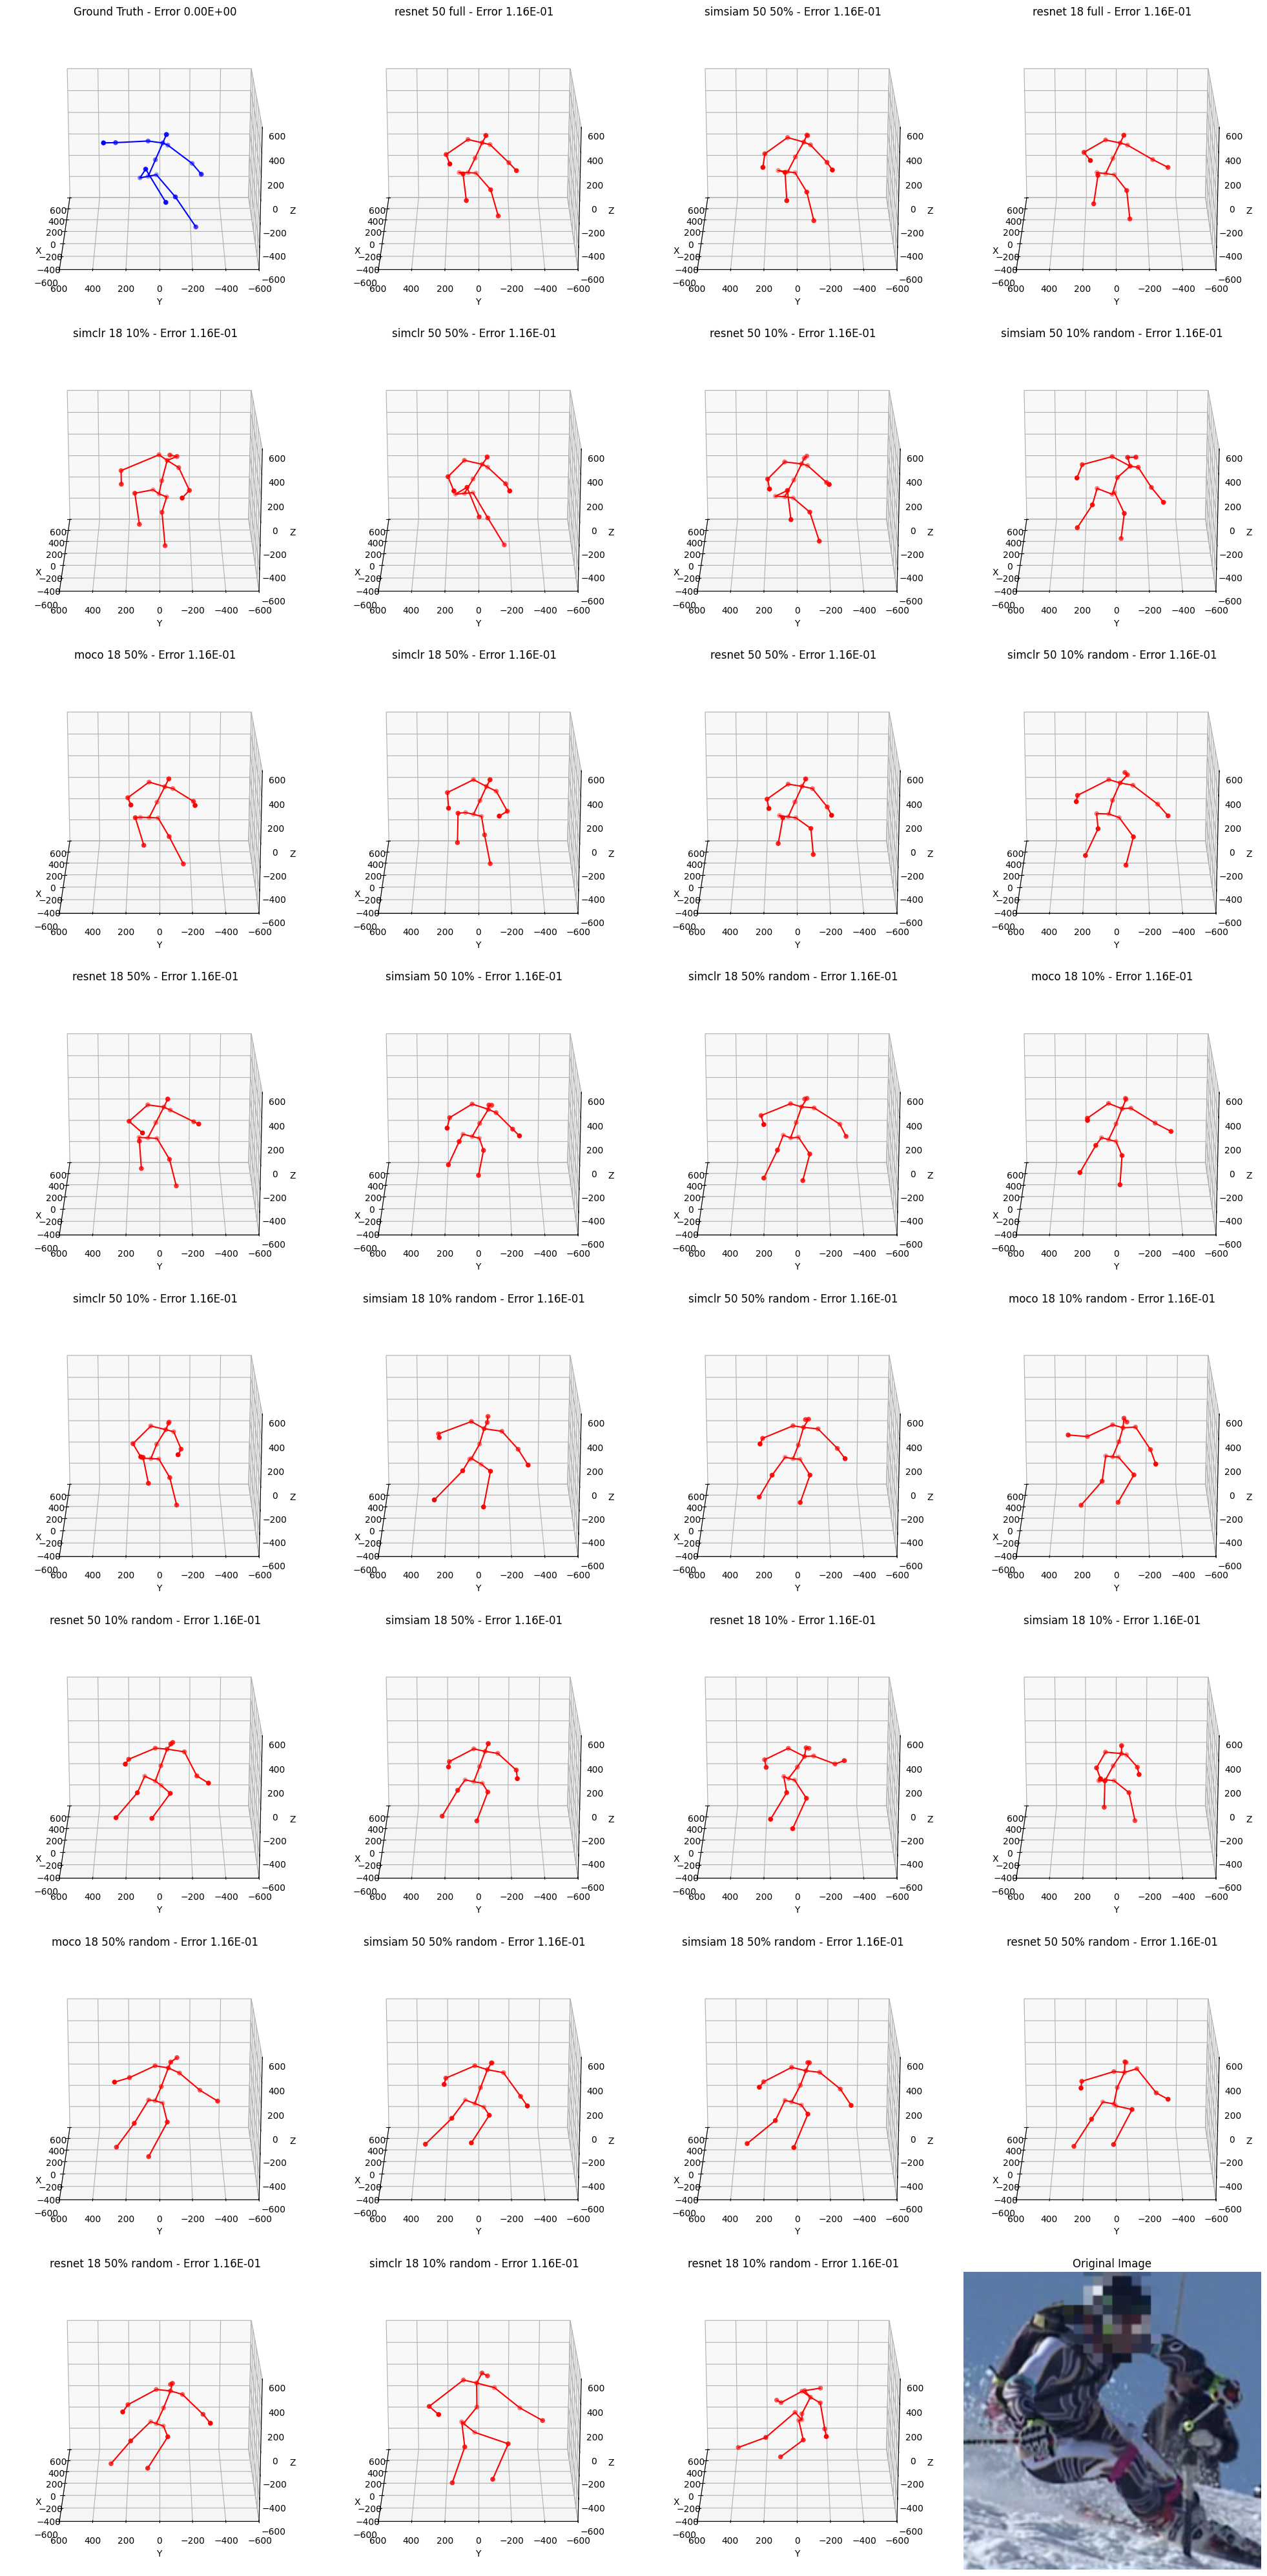

________________________________________________________
Index:  2
Ranking:
	1 - "simsiam 18 50%" Loss 0.11149684339761734
	2 - "simclr 50 50%" Loss 0.1116250604391098
	3 - "simclr 50 10%" Loss 0.11327485740184784
	4 - "simsiam 50 50%" Loss 0.1146463006734848
	5 - "resnet 50 full" Loss 0.12343042343854904
	6 - "moco 18 50%" Loss 0.12646354734897614
	7 - "resnet 50 10%" Loss 0.1284569650888443
	8 - "simsiam 18 10%" Loss 0.13094933331012726
	9 - "simsiam 50 50% random" Loss 0.13193176686763763
	10 - "resnet 18 full" Loss 0.13654464483261108
	11 - "simclr 18 10% random" Loss 0.13673052191734314
	12 - "simclr 18 10%" Loss 0.1375991851091385
	13 - "simclr 50 50% random" Loss 0.13870899379253387
	14 - "resnet 50 50%" Loss 0.13966146111488342
	15 - "resnet 18 10%" Loss 0.1437053680419922
	16 - "resnet 18 50% random" Loss 0.1470055729150772
	17 - "resnet 50 50% random" Loss 0.1474418342113495
	18 - "moco 18 50% random" Loss 0.154873326420784
	19 - "simclr 50 10% random" Loss 0.1554956138134002

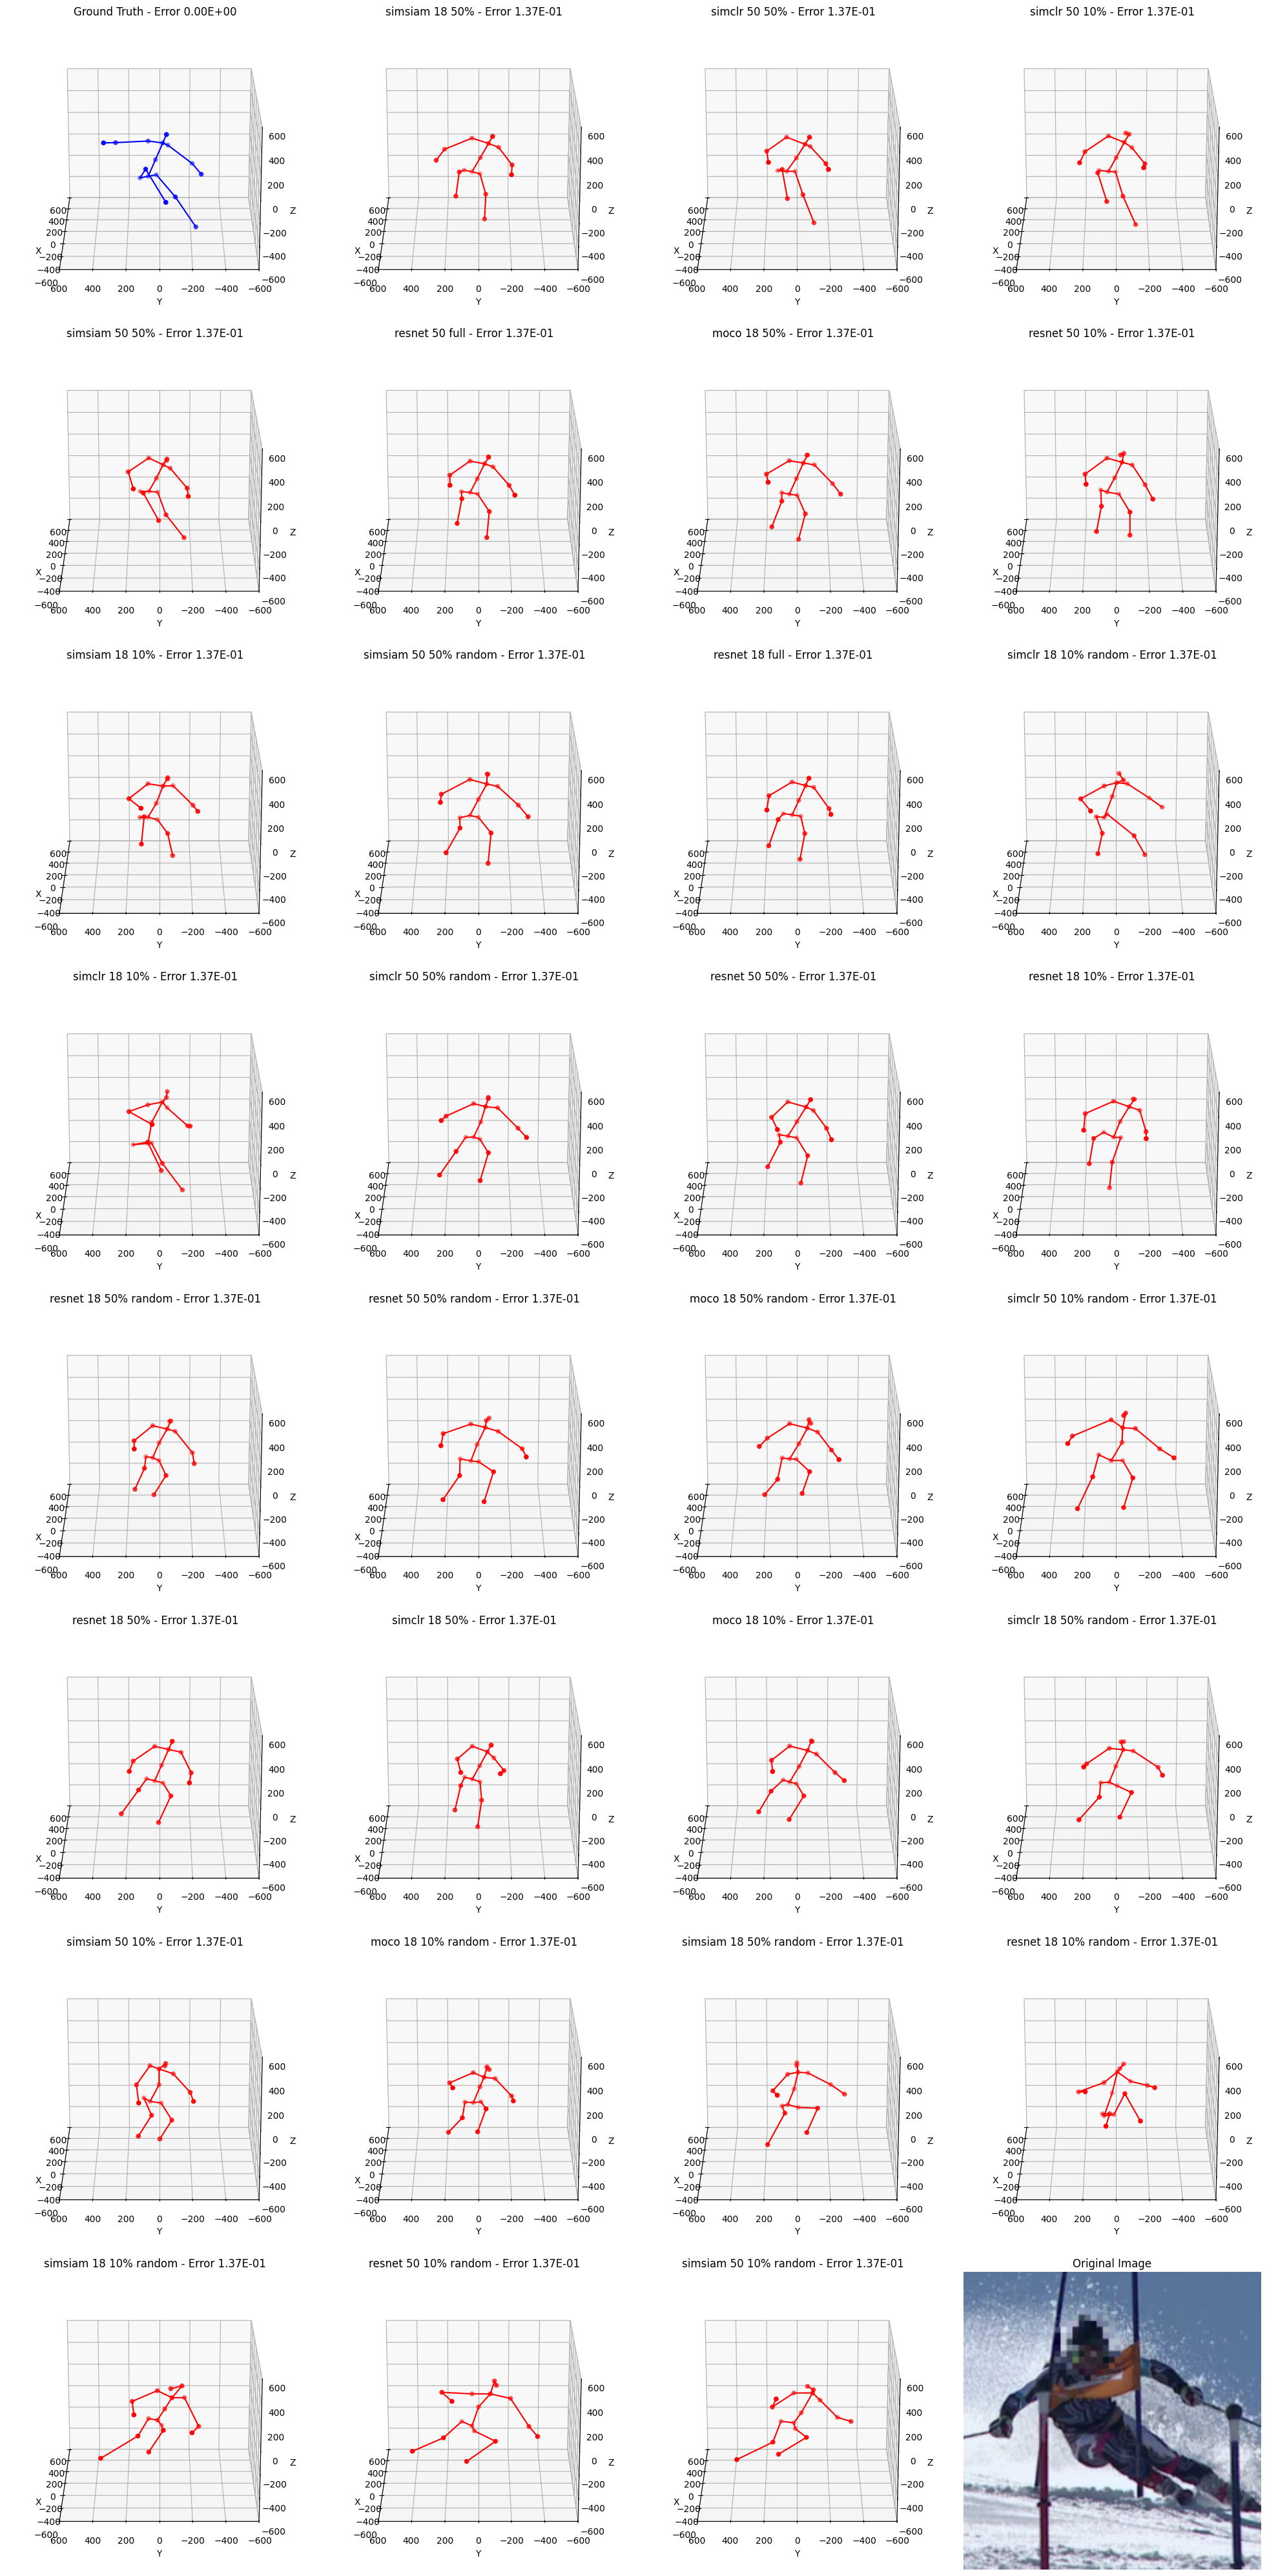

In [7]:
for index in indexes:

    print("________________________________________________________")

    print("Index: ", index)

    plot_models(
        clear_models,
        backbones,
        index,
        all_connections,
        test_data,
        dataset,
        models_out,
        names,
        show_image=True,
        models_to_plot=None,
    )